In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [23]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [24]:
input=pd.DataFrame(iris.data,columns=iris.feature_names)
input.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [25]:
input['target']=iris.target
input.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [28]:
input['Flower name']=input.target.apply(lambda x:iris.target_names[x])
input.head(4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa


In [31]:
df0=input[:50]
df1=input[50:100]
df2=input[100:150]

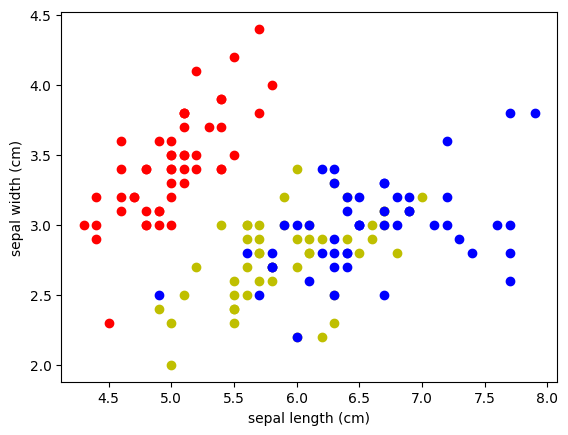

In [36]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='r')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='y')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='b')

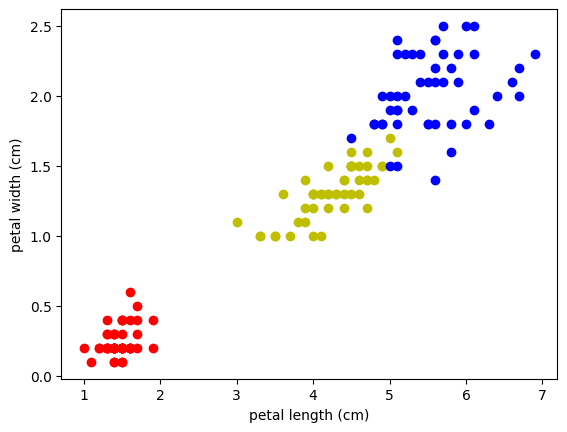

In [35]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='r')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='y')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='b')

In [38]:
x=input.drop(['Flower name','target'],axis=1)
y=input.target
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [41]:
len(X_train)

112

In [42]:
len(X_test)

38

In [43]:
len(x)

150

In [44]:
knn=KNeighborsClassifier(n_neighbors=3)

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
y_predict=knn.predict(X_test)
knn.score(X_test,y_test)

0.9736842105263158

In [50]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predict,y_test)

<Axes: >

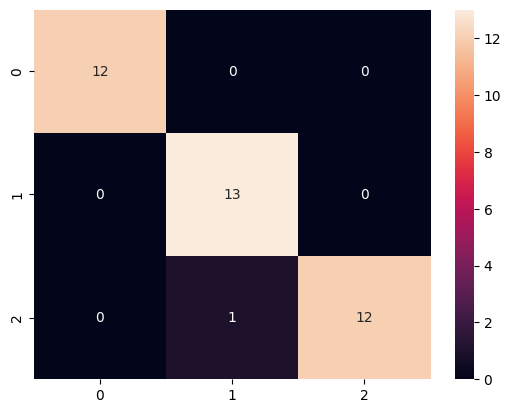

In [51]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [53]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

